# House Pricing/Sales Prediction - Advanced Regression 
### The notebook has below segments: 
#### - EDA & Data Cleansing (Null Handling, Outlier Analysis)
#### - Data preparation (Test/Train split, normalizing  the data )
#### - Model building and evaluation 

### 1.  EDA and Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
house_df = pd.read_csv("train.csv")

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_df.shape

(1460, 81)

In [6]:

emptycol = house_df.isnull().sum()/len(house_df)
emptycol = list(emptycol[emptycol.values>=0.3].index)
house_df.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

5


In [7]:
# Checking the columns having less null percentage

house_df.isnull().sum()/len(house_df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 76, dtype: float64

In [8]:
house_df_categorical = house_df.select_dtypes(include=['object'])
house_df_categorical.shape

(1460, 38)

In [9]:
round(house_df.MSZoning.value_counts(normalize='True')*100,2)

RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64

In [10]:
round(house_df.Street.value_counts(normalize='True')*100,2)

Pave    99.59
Grvl     0.41
Name: Street, dtype: float64

In [11]:
round(house_df.LotShape.value_counts(normalize='True')*100,2)

Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64

In [12]:
round(house_df.LandContour.value_counts(normalize='True')*100,2)

Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64

In [13]:
round(house_df.Utilities.value_counts(normalize='True')*100,2)

AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64

In [14]:
round(house_df.LotConfig.value_counts(normalize='True')*100,2)

Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dtype: float64

In [15]:
round(house_df.LandSlope.value_counts(normalize='True')*100,2)

Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64

In [16]:
round(house_df.Neighborhood.value_counts(normalize='True')*100,2)

NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4.04
BrkSide     3.97
Crawfor     3.49
Mitchel     3.36
NoRidge     2.81
Timber      2.60
IDOTRR      2.53
ClearCr     1.92
StoneBr     1.71
SWISU       1.71
MeadowV     1.16
Blmngtn     1.16
BrDale      1.10
Veenker     0.75
NPkVill     0.62
Blueste     0.14
Name: Neighborhood, dtype: float64

In [17]:
round(house_df.Condition1.value_counts(normalize='True')*100,2)

Norm      86.30
Feedr      5.55
Artery     3.29
RRAn       1.78
PosN       1.30
RRAe       0.75
PosA       0.55
RRNn       0.34
RRNe       0.14
Name: Condition1, dtype: float64

In [18]:
round(house_df.Condition2.value_counts(normalize='True')*100,2)

Norm      98.97
Feedr      0.41
Artery     0.14
PosN       0.14
RRNn       0.14
RRAe       0.07
RRAn       0.07
PosA       0.07
Name: Condition2, dtype: float64

In [19]:
round(house_df.BldgType.value_counts(normalize='True')*100,2)

1Fam      83.56
TwnhsE     7.81
Duplex     3.56
Twnhs      2.95
2fmCon     2.12
Name: BldgType, dtype: float64

In [20]:
round(house_df.HouseStyle.value_counts(normalize='True')*100,2)

1Story    49.73
2Story    30.48
1.5Fin    10.55
SLvl       4.45
SFoyer     2.53
1.5Unf     0.96
2.5Unf     0.75
2.5Fin     0.55
Name: HouseStyle, dtype: float64

In [21]:
round(house_df.RoofStyle.value_counts(normalize='True')*100,2)

Gable      78.15
Hip        19.59
Flat        0.89
Gambrel     0.75
Mansard     0.48
Shed        0.14
Name: RoofStyle, dtype: float64

In [22]:
round(house_df.RoofMatl.value_counts(normalize='True')*100,2)

CompShg    98.22
Tar&Grv     0.75
WdShngl     0.41
WdShake     0.34
Roll        0.07
Metal       0.07
Membran     0.07
ClyTile     0.07
Name: RoofMatl, dtype: float64

In [23]:
round(house_df.Exterior1st.value_counts(normalize='True')*100,2)

VinylSd    35.27
HdBoard    15.21
MetalSd    15.07
Wd Sdng    14.11
Plywood     7.40
CemntBd     4.18
BrkFace     3.42
WdShing     1.78
Stucco      1.71
AsbShng     1.37
Stone       0.14
BrkComm     0.14
ImStucc     0.07
CBlock      0.07
AsphShn     0.07
Name: Exterior1st, dtype: float64

In [24]:
round(house_df.ExterQual.value_counts(normalize='True')*100,2)

TA    62.05
Gd    33.42
Ex     3.56
Fa     0.96
Name: ExterQual, dtype: float64

In [25]:
round(house_df.ExterCond.value_counts(normalize='True')*100,2)

TA    87.81
Gd    10.00
Fa     1.92
Ex     0.21
Po     0.07
Name: ExterCond, dtype: float64

In [26]:
round(house_df.Foundation.value_counts(normalize='True')*100,2)

PConc     44.32
CBlock    43.42
BrkTil    10.00
Slab       1.64
Stone      0.41
Wood       0.21
Name: Foundation, dtype: float64

In [27]:
house_df.BsmtQual.isnull().sum()

37

In [28]:
round(house_df.BsmtQual.value_counts(normalize='True')*100,2)

TA    45.61
Gd    43.43
Ex     8.50
Fa     2.46
Name: BsmtQual, dtype: float64

In [29]:
# Imputing NAs in column 'BsmtQual' with "TA" as it has highest occurances in the Leads dataset

house_df["BsmtQual"].fillna("TA", inplace = True) 
round(house_df['BsmtQual'].value_counts(normalize=True)*100,2)

TA    46.99
Gd    42.33
Ex     8.29
Fa     2.40
Name: BsmtQual, dtype: float64

In [30]:
round(house_df.BsmtCond.value_counts(normalize='True')*100,2)

TA    92.13
Gd     4.57
Fa     3.16
Po     0.14
Name: BsmtCond, dtype: float64

In [31]:
round(house_df.BsmtExposure.value_counts(normalize='True')*100,2)

No    67.02
Av    15.54
Gd     9.42
Mn     8.02
Name: BsmtExposure, dtype: float64

In [32]:
house_df.BsmtFinType1.isnull().sum()

37

In [33]:
round(house_df.BsmtFinType1.value_counts(normalize='True')*100,2)

Unf    30.22
GLQ    29.37
ALQ    15.46
BLQ    10.40
Rec     9.35
LwQ     5.20
Name: BsmtFinType1, dtype: float64

In [34]:
# Imputing NAs in column 'BsmtQual' with "Unf" as it has highest occurances in the Leads dataset

house_df["BsmtFinType1"].fillna("Unf", inplace = True) 
round(house_df['BsmtFinType1'].value_counts(normalize=True)*100,2)

Unf    31.99
GLQ    28.63
ALQ    15.07
BLQ    10.14
Rec     9.11
LwQ     5.07
Name: BsmtFinType1, dtype: float64

In [35]:
house_df.BsmtFinType2.isnull().sum()

38

In [36]:
round(house_df.BsmtFinType2.value_counts(normalize='True')*100,2)

Unf    88.33
Rec     3.80
LwQ     3.23
BLQ     2.32
ALQ     1.34
GLQ     0.98
Name: BsmtFinType2, dtype: float64

In [37]:
# Imputing NAs in column 'BsmtFinType2' with "Unf" as it has highest occurances in the Leads dataset

house_df["BsmtFinType2"].fillna("Unf", inplace = True) 
round(house_df['BsmtFinType2'].value_counts(normalize=True)*100,2)

Unf    88.63
Rec     3.70
LwQ     3.15
BLQ     2.26
ALQ     1.30
GLQ     0.96
Name: BsmtFinType2, dtype: float64

In [38]:
round(house_df.Heating.value_counts(normalize='True')*100,2)

GasA     97.81
GasW      1.23
Grav      0.48
Wall      0.27
OthW      0.14
Floor     0.07
Name: Heating, dtype: float64

In [39]:
round(house_df.HeatingQC.value_counts(normalize='True')*100,2)

Ex    50.75
TA    29.32
Gd    16.51
Fa     3.36
Po     0.07
Name: HeatingQC, dtype: float64

In [40]:
round(house_df.CentralAir.value_counts(normalize='True')*100,2)

Y    93.49
N     6.51
Name: CentralAir, dtype: float64

In [41]:
round(house_df.Electrical.value_counts(normalize='True')*100,2)

SBrkr    91.43
FuseA     6.44
FuseF     1.85
FuseP     0.21
Mix       0.07
Name: Electrical, dtype: float64

In [42]:
round(house_df.KitchenQual.value_counts(normalize='True')*100,2)

TA    50.34
Gd    40.14
Ex     6.85
Fa     2.67
Name: KitchenQual, dtype: float64

In [43]:
round(house_df.Functional.value_counts(normalize='True')*100,2)

Typ     93.15
Min2     2.33
Min1     2.12
Mod      1.03
Maj1     0.96
Maj2     0.34
Sev      0.07
Name: Functional, dtype: float64

In [44]:
house_df.GarageType.isnull().sum()

81

In [45]:
round(house_df.GarageType.value_counts(normalize='True')*100,2) 

Attchd     63.09
Detchd     28.06
BuiltIn     6.38
Basment     1.38
CarPort     0.65
2Types      0.44
Name: GarageType, dtype: float64

In [46]:
# Imputing NAs in column 'GarageType' with "Attchd" as it has highest occurances in the Leads dataset

house_df["GarageType"].fillna("Attchd", inplace = True) 
round(house_df.GarageType.value_counts(normalize='True')*100,2) 

Attchd     65.14
Detchd     26.51
BuiltIn     6.03
Basment     1.30
CarPort     0.62
2Types      0.41
Name: GarageType, dtype: float64

In [47]:
house_df.GarageFinish.isnull().sum()

81

In [48]:
round(house_df.GarageFinish.value_counts(normalize='True')*100,2) 

Unf    43.87
RFn    30.60
Fin    25.53
Name: GarageFinish, dtype: float64

In [49]:
# Imputing NAs in column 'GarageFinish' with "Unf" as it has highest occurances in the Leads dataset

house_df["GarageFinish"].fillna("Unf", inplace = True) 
round(house_df.GarageFinish.value_counts(normalize='True')*100,2) 

Unf    46.99
RFn    28.90
Fin    24.11
Name: GarageFinish, dtype: float64

In [50]:
round(house_df.GarageQual.value_counts(normalize='True')*100,2)

TA    95.07
Fa     3.48
Gd     1.02
Po     0.22
Ex     0.22
Name: GarageQual, dtype: float64

In [51]:
round(house_df.GarageCond.value_counts(normalize='True')*100,2)

TA    96.16
Fa     2.54
Gd     0.65
Po     0.51
Ex     0.15
Name: GarageCond, dtype: float64

In [52]:
round(house_df.PavedDrive.value_counts(normalize='True')*100,2)

Y    91.78
N     6.16
P     2.05
Name: PavedDrive, dtype: float64

In [53]:
round(house_df.SaleType.value_counts(normalize='True')*100,2)

WD       86.78
New       8.36
COD       2.95
ConLD     0.62
ConLw     0.34
ConLI     0.34
CWD       0.27
Oth       0.21
Con       0.14
Name: SaleType, dtype: float64

In [54]:
round(house_df.SaleCondition.value_counts(normalize='True')*100,2)

Normal     82.05
Partial     8.56
Abnorml     6.92
Family      1.37
Alloca      0.82
AdjLand     0.27
Name: SaleCondition, dtype: float64

In [55]:
house_df.BsmtExposure.isnull().sum()

38

In [56]:
round(house_df.BsmtExposure.value_counts(normalize='True')*100,2) 

No    67.02
Av    15.54
Gd     9.42
Mn     8.02
Name: BsmtExposure, dtype: float64

In [57]:
# Imputing NAs in column 'BsmtExposure' with "No" as it has highest occurances in the Leads dataset

house_df["BsmtExposure"].fillna("No", inplace = True) 
round(house_df.BsmtExposure.value_counts(normalize='True')*100,2) 

No    67.88
Av    15.14
Gd     9.18
Mn     7.81
Name: BsmtExposure, dtype: float64

In [58]:
house_df['MSSubClass'] = house_df['MSSubClass'].astype('object')

house_df['OverallQual'] = house_df['OverallQual'].astype('object')

house_df['OverallCond'] = house_df['OverallCond'].astype('object')

house_df['MoSold'] = house_df['MoSold'].astype('object')

In [59]:
round(house_df.MSSubClass.value_counts(normalize='True')*100,2) 

20     36.71
60     20.48
50      9.86
120     5.96
30      4.73
160     4.32
70      4.11
80      3.97
90      3.56
190     2.05
85      1.37
75      1.10
45      0.82
180     0.68
40      0.27
Name: MSSubClass, dtype: float64

In [60]:
round(house_df.OverallQual.value_counts(normalize='True')*100,2) 

5     27.19
6     25.62
7     21.85
8     11.51
4      7.95
9      2.95
3      1.37
10     1.23
2      0.21
1      0.14
Name: OverallQual, dtype: float64

In [61]:
round(house_df.OverallCond.value_counts(normalize='True')*100,2) 

5    56.23
6    17.26
7    14.04
8     4.93
4     3.90
3     1.71
9     1.51
2     0.34
1     0.07
Name: OverallCond, dtype: float64

In [62]:
round(house_df.MoSold.value_counts(normalize='True')*100,2) 

6     17.33
7     16.03
5     13.97
4      9.66
8      8.36
3      7.26
10     6.10
11     5.41
9      4.32
12     4.04
1      3.97
2      3.56
Name: MoSold, dtype: float64

In [63]:
house_df_numeric = house_df.select_dtypes(include=['float64', 'int64'])
house_df_numeric.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,548,0,61,0,0,0,0,0,2008,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,0,2007,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,608,0,42,0,0,0,0,0,2008,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,642,0,35,272,0,0,0,0,2006,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,0,2008,250000


In [64]:
house_df_numeric.isnull().sum()

Id                 0
LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
YrSold             0
SalePrice          0
dtype: int64

In [65]:
# Filling missing values with median

values=house_df['LotFrontage'].median()

house_df.loc[house_df['LotFrontage'].isnull(),'LotFrontage']=values
house_df.LotFrontage.isnull().sum()

0

In [66]:
# Filling missing values with median

values=house_df['GarageYrBlt'].median()

house_df.loc[house_df['GarageYrBlt'].isnull(),'GarageYrBlt']=values
house_df.GarageYrBlt.isnull().sum()

0

In [67]:
# Filling missing values with median

values=house_df['MasVnrArea'].median()

house_df.loc[house_df['MasVnrArea'].isnull(),'MasVnrArea']=values
house_df.MasVnrArea.isnull().sum()

0

In [68]:
house_df.shape

(1460, 76)

In [69]:
# Timeline related fields - YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold

In [70]:
# Computing the ages

house_df['Age_Built'] = house_df['YrSold']-house_df['YearBuilt']

house_df['Age_YearRemod'] = house_df['YrSold']-house_df['YearRemodAdd']

house_df['Age_Garage'] = house_df['YrSold']-house_df['GarageYrBlt']



In [71]:
#Dropping the final set of uncessary columns based on skewed values, year related fields, ID. 

house_df.drop(['Street','LandContour','Utilities','LandSlope',
               'RoofMatl','BsmtCond','Heating','CentralAir',
               'Electrical','Functional','GarageQual','GarageCond','PavedDrive',
                'YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1, inplace=True)

In [72]:
house_df_numeric = house_df.select_dtypes(include=['float64', 'int64'])
house_df_numeric.drop(['Id'], axis=1, inplace=True)
house_df_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age_Built,Age_YearRemod,Age_Garage
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,61,0,0,0,0,0,208500,5,5,5.0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,0,181500,31,31,31.0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,42,0,0,0,0,0,223500,7,6,7.0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,35,272,0,0,0,0,140000,91,36,8.0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,84,0,0,0,0,0,250000,8,8,8.0


In [73]:
# correlation matrix
cor = house_df_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age_Built,Age_YearRemod,Age_Garage
LotFrontage,1.000000,0.304522,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,...,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.334771,-0.116223,-0.082957,-0.062544
LotArea,0.304522,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,-0.014832,-0.014709,0.025036
MasVnrArea,0.178469,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,...,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,-0.311479,-0.177105,-0.244519
BsmtFinSF1,0.214367,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,-0.248483,-0.127556,-0.147755
BsmtFinSF2,0.042463,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.050422,0.069814,0.089298
BsmtUnfSF,0.124098,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,-0.150619,-0.183830,-0.187598
TotalBsmtSF,0.363472,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,-0.391498,-0.292096,-0.309726
1stFlrSF,0.413773,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852,-0.282143,-0.241310,-0.225294
2ndFlrSF,0.072388,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334,-0.011552,-0.141903,-0.069919
LowQualFinSF,0.037469,0.004779,-0.068628,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606,0.182228,0.060573,0.025455


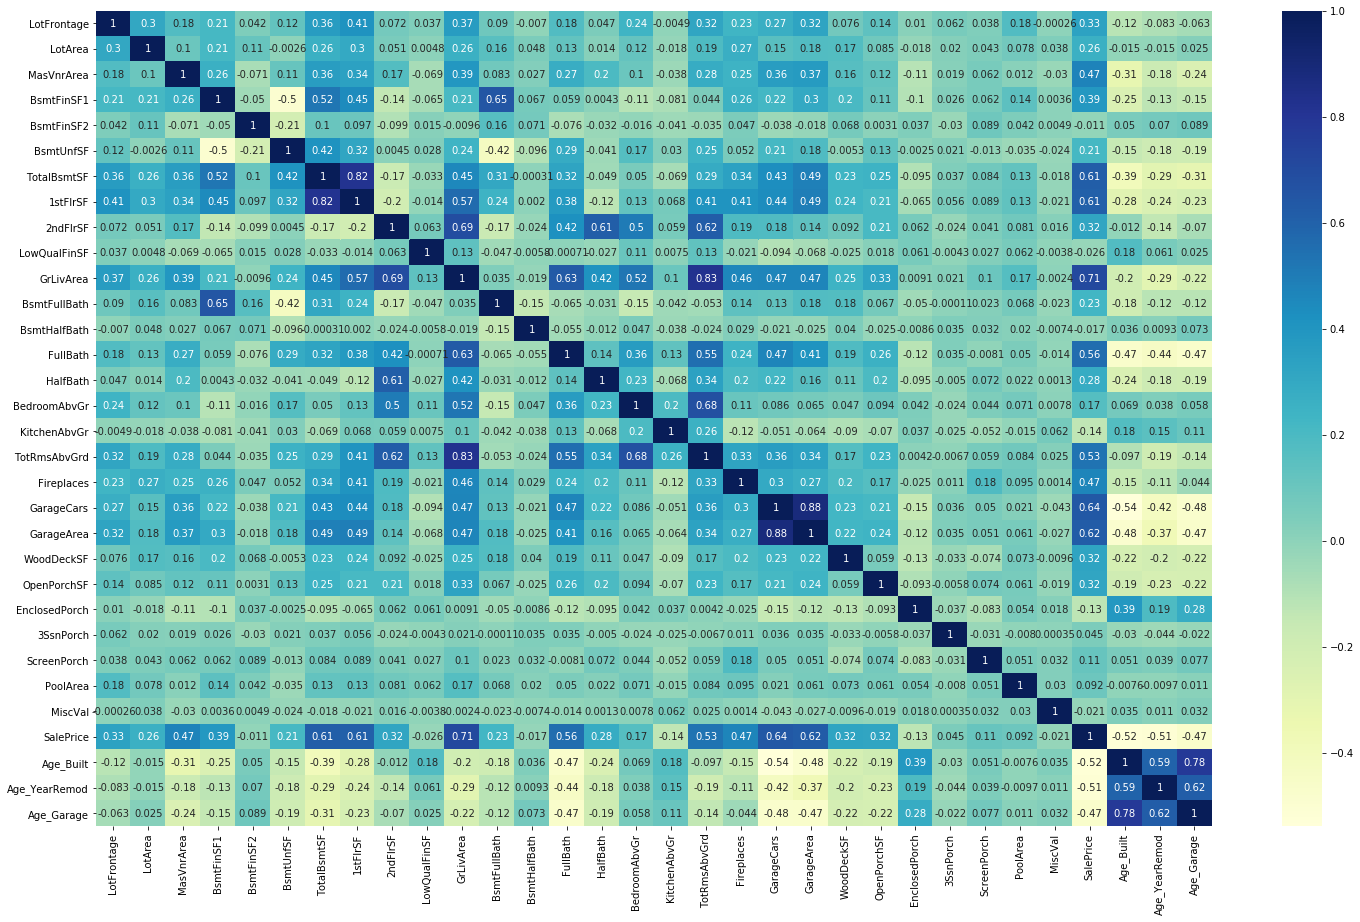

In [74]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

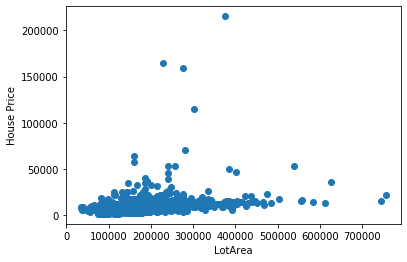

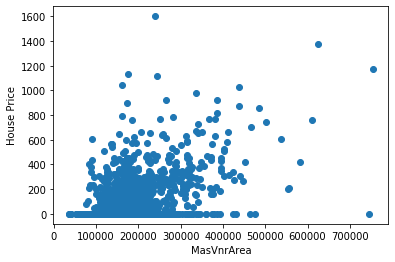

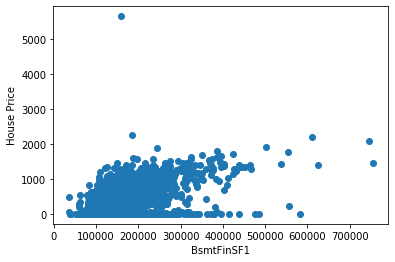

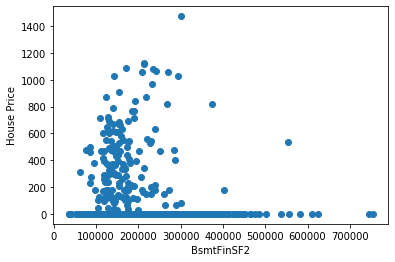

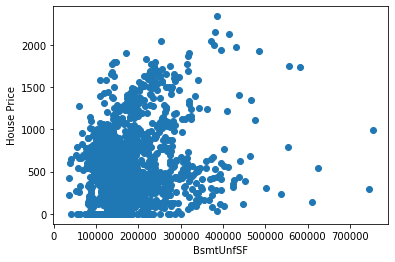

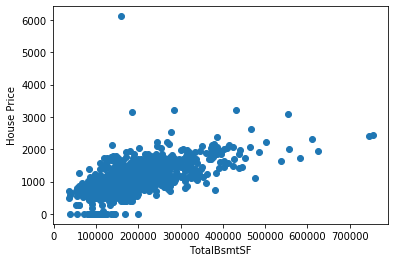

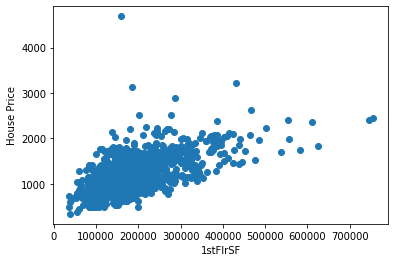

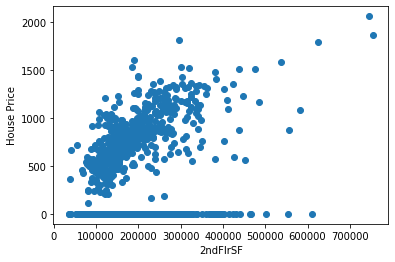

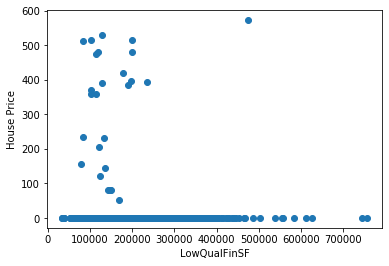

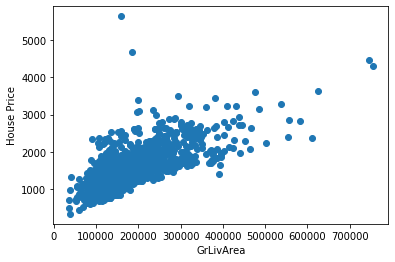

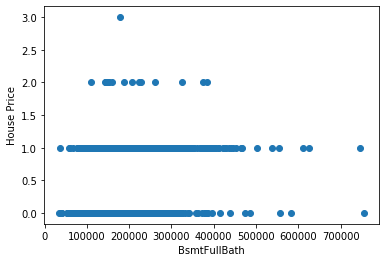

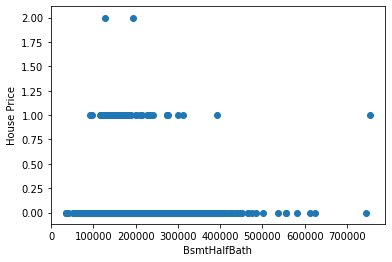

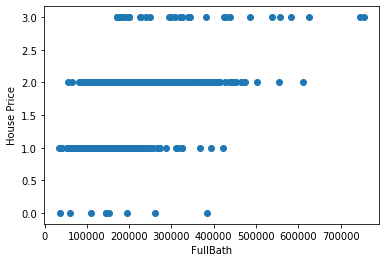

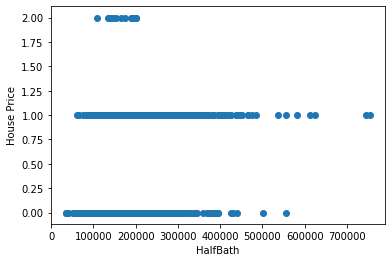

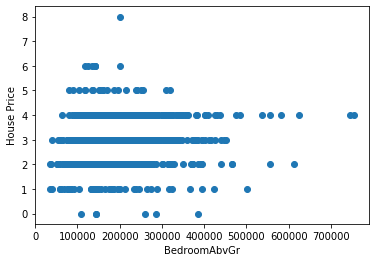

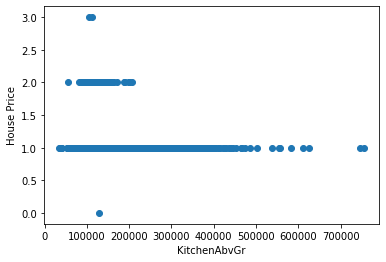

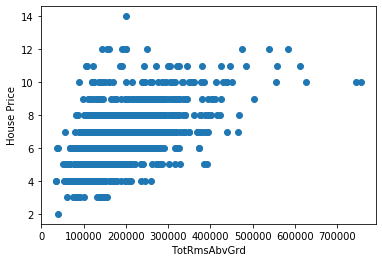

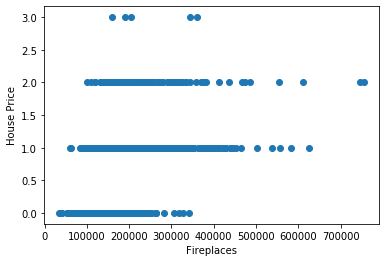

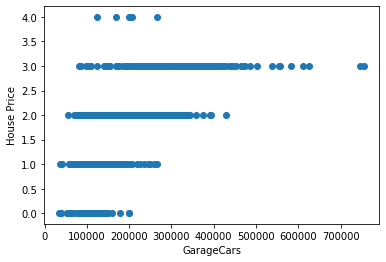

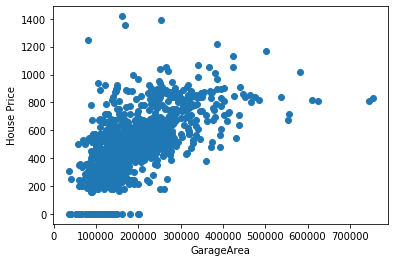

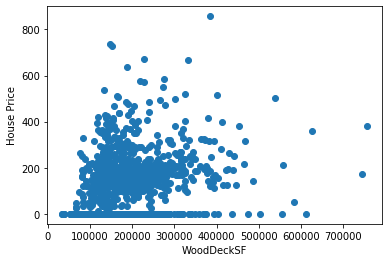

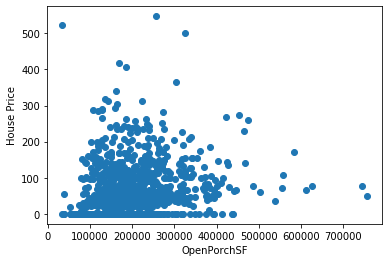

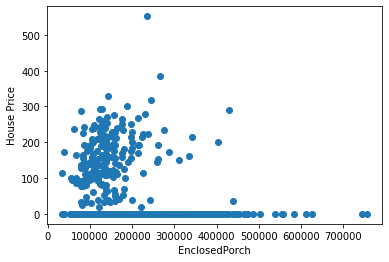

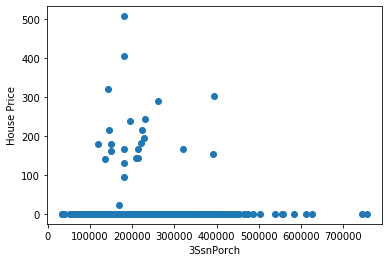

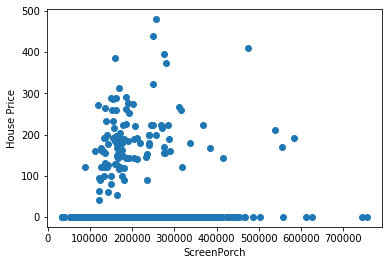

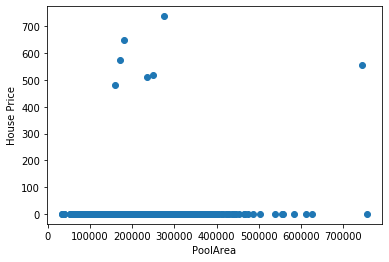

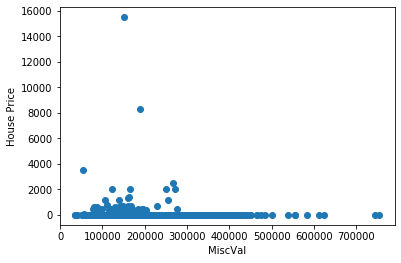

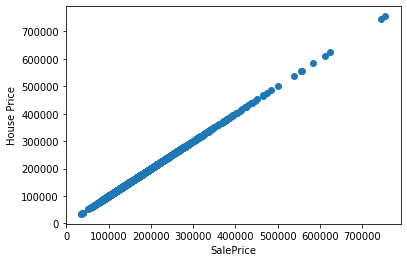

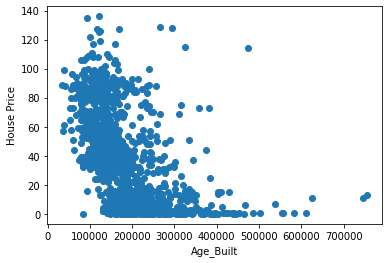

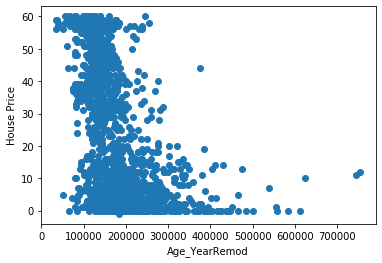

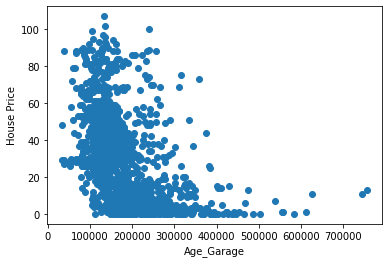

In [75]:
# plot CO2 with all other variables

plt.figure()
for col in range(1, house_df_numeric.shape[1]):
    plt.scatter(house_df_numeric["SalePrice"], house_df_numeric.iloc[:, col])
    plt.xlabel(house_df_numeric.columns[col])
    plt.ylabel("House Price")
    plt.show()

In [76]:
house_df.shape

(1460, 62)

In [77]:
#Dropping the final set of uncessary columns based on skewed values, year related fields, ID. 

house_df.drop(['TotRmsAbvGrd','GarageCars','Age_Garage','1stFlrSF','Id'], axis=1, inplace=True)

In [78]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   Condition2     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   object 
 12  OverallCond    1460 non-null   object 
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1452 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

## 2. Data Preparation 

#### Data Preparation

In [79]:
# split into X and y
X = house_df.loc[:, house_df.columns != 'SalePrice'] 

y = house_df['SalePrice']

In [80]:
# creating dummy variables for categorical variables
# subset all categorical variables

house_df_categorical = X.select_dtypes(include=['object'])
house_df_categorical.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageType,GarageFinish,MoSold,SaleType,SaleCondition
0,60,RL,Reg,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,No,GLQ,Unf,Ex,Gd,Attchd,RFn,2,WD,Normal
1,20,RL,Reg,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,...,Gd,ALQ,Unf,Ex,TA,Attchd,RFn,5,WD,Normal
2,60,RL,IR1,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,Mn,GLQ,Unf,Ex,Gd,Attchd,RFn,9,WD,Normal
3,70,RL,IR1,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,...,No,ALQ,Unf,Gd,Gd,Detchd,Unf,2,WD,Abnorml
4,60,RL,IR1,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,...,Av,GLQ,Unf,Ex,Gd,Attchd,RFn,12,WD,Normal


In [81]:
# convert into dummies
house_df_dummies = pd.get_dummies(house_df_categorical, drop_first=True)
house_df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [82]:
# drop categorical variables 
X = X.drop(list(house_df_categorical.columns), axis=1)

In [83]:
# concat dummy variables with X
X = pd.concat([X, house_df_dummies], axis=1)

In [84]:
X.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,346.992466,5.844521,1515.463699,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,436.528436,48.623081,525.480383,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,0.000000,1129.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,0.000000,1464.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,728.000000,0.000000,1776.750000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,2065.000000,572.000000,5642.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [86]:
# scaling the features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
scaler.fit(X)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 100)

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  

In [88]:
# Running RFE to determine 15 most effective 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)

In [89]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 177),
 ('LotArea', False, 194),
 ('MasVnrArea', False, 188),
 ('BsmtFinSF1', False, 192),
 ('BsmtFinSF2', False, 190),
 ('BsmtUnfSF', False, 196),
 ('TotalBsmtSF', False, 193),
 ('2ndFlrSF', False, 183),
 ('LowQualFinSF', False, 186),
 ('GrLivArea', False, 179),
 ('BsmtFullBath', False, 19),
 ('BsmtHalfBath', False, 63),
 ('FullBath', True, 1),
 ('HalfBath', False, 17),
 ('BedroomAbvGr', False, 78),
 ('KitchenAbvGr', False, 111),
 ('Fireplaces', False, 54),
 ('GarageArea', False, 184),
 ('WoodDeckSF', False, 189),
 ('OpenPorchSF', False, 191),
 ('EnclosedPorch', False, 187),
 ('3SsnPorch', False, 181),
 ('ScreenPorch', False, 185),
 ('PoolArea', False, 178),
 ('MiscVal', False, 195),
 ('Age_Built', False, 176),
 ('Age_YearRemod', False, 182),
 ('MSSubClass_30', False, 110),
 ('MSSubClass_40', False, 49),
 ('MSSubClass_45', False, 134),
 ('MSSubClass_50', False, 155),
 ('MSSubClass_60', False, 106),
 ('MSSubClass_70', False, 171),
 ('MSSubClass_75', False, 70),
 

In [90]:
col = X_train.columns[rfe.support_]
col

Index(['FullBath', 'MSSubClass_160', 'MSSubClass_180', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Veenker',
       'Condition2_PosN', 'BldgType_Duplex', 'OverallQual_2', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'RoofStyle_Shed',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA'],
      dtype='object')

In [91]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=197)

#### Running Statsmodel for detailed statistics

In [92]:
X_train_rfe = X_train[col]

In [93]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [94]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [95]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     150.5
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          3.48e-317
Time:                        21:19:32   Log-Likelihood:                -12177.
No. Observations:                1022   AIC:                         2.441e+04
Df Residuals:                     996   BIC:                         2.453e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.033e+05 

In [96]:
X_train = X_train[col]
X_test = X_test[col]

In [97]:
X_train.shape, X_test.shape

((1022, 25), (438, 25))

In [98]:
y_train.shape, y_test.shape

((1022,), (438,))

In [99]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
# predict
y_train_pred = lm1.predict(X_train)
y_test_pred = lm1.predict(X_test)

In [101]:
print(round(r2_score(y_true=y_train, y_pred=y_train_pred)*100,2))
print(round(r2_score(y_true=y_test, y_pred=y_test_pred)*100,2))

79.07
72.83


## Ridge and Lasso Regression

### Ridge Regression - Hyperparameter Tuning

In [102]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)   

In [103]:
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [104]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009807,0.005612,0.000647,0.000884,0.0001,{'alpha': 0.0001},-27921.063686,-28228.236324,-26982.240795,-26968.478882,...,-27323.268603,643.375773,14,-25601.112200,-25246.898590,-26108.234684,-25861.040233,-25596.166274,-25682.690396,288.774143
1,0.010397,0.007239,0.000216,0.000432,0.001,{'alpha': 0.001},-27920.981352,-28227.753634,-26982.152693,-26967.154011,...,-27322.802512,643.468712,13,-25601.343777,-25247.298148,-26108.402607,-25861.700139,-25596.666511,-25683.082236,288.741545
2,0.012798,0.004796,0.002465,0.001257,0.01,{'alpha': 0.01},-27920.137694,-28222.981012,-26981.283940,-26954.024017,...,-27318.182244,644.402300,12,-25603.632614,-25251.249156,-26110.064285,-25868.230340,-25601.615978,-25686.958475,288.425785
3,0.013246,0.003062,0.001811,0.002278,0.05,{'alpha': 0.05},-27915.970988,-28202.903543,-26977.396861,-26898.156754,...,-27298.443641,648.650064,11,-25616.626622,-25268.856859,-26117.275990,-25895.813661,-25622.527843,-25704.220195,286.778888
4,0.008332,0.002948,0.006227,0.002566,0.1,{'alpha': 0.1},-27909.926437,-28180.163716,-26973.434211,-26833.525545,...,-27275.627418,654.001551,10,-25632.205882,-25293.456453,-26126.860276,-25927.296146,-25646.448523,-25725.253456,284.051406


In [105]:

cv_results.to_csv("test.csv")

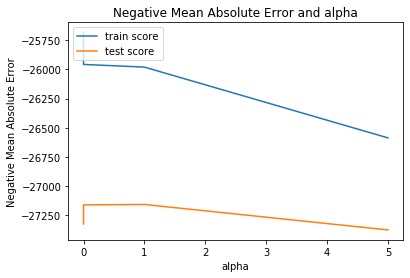

In [106]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

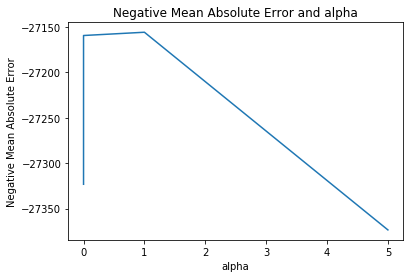

In [107]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")

plt.show()

### Model with optimal alpha Ridge regression
#### It can be observed that Test Error is peaing out at 1 and keeps decresing thereafter. Hence 1 is the value of alpha suitable for Ridge Regression

##### The final ridge model with alpha=1 has 74.56% of accuracy on test dataset

In [108]:
ridge_final = Ridge(alpha=1)
ridge_final.fit(X_train, y_train)


y_train_pred_r = ridge_final.predict(X_train)
print(round(r2_score(y_true=y_train, y_pred=y_train_pred_r)*100,2))
y_test_pred_r = ridge_final.predict(X_test)
print(round(r2_score(y_true=y_test, y_pred=y_test_pred_r)*100,2))

78.62
74.56


In [110]:
# Ridge model parameters
model_parameters_ridge = list(ridge_final.coef_)
model_parameters_ridge.insert(0, ridge_final.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters_ridge]
r_cols = X_train.columns
r_cols = r_cols.insert(0, "constant")
list(zip(r_cols, model_parameters_ridge))

[('constant', 202900.485),
 ('FullBath', 35620.189),
 ('MSSubClass_160', -29467.543),
 ('MSSubClass_180', -51501.634),
 ('Neighborhood_ClearCr', 29407.511),
 ('Neighborhood_Crawfor', 40470.093),
 ('Neighborhood_NoRidge', 79911.59),
 ('Neighborhood_Veenker', 26118.629),
 ('Condition2_PosN', -138336.127),
 ('BldgType_Duplex', -30959.873),
 ('OverallQual_2', -31893.797),
 ('OverallQual_8', 43885.231),
 ('OverallQual_9', 80935.24),
 ('OverallQual_10', 120002.736),
 ('RoofStyle_Shed', 39632.093),
 ('Exterior1st_ImStucc', -29432.703),
 ('Exterior1st_Stone', 17994.901),
 ('Foundation_Stone', 26589.402),
 ('Foundation_Wood', 26093.789),
 ('BsmtQual_Fa', -72391.269),
 ('BsmtQual_Gd', -39432.325),
 ('BsmtQual_TA', -56929.286),
 ('BsmtExposure_Gd', 31658.466),
 ('KitchenQual_Fa', -77031.071),
 ('KitchenQual_Gd', -37639.954),
 ('KitchenQual_TA', -59539.127)]

In [111]:
Ridge_coef1 = pd.DataFrame(list(zip(r_cols,model_parameters_ridge)))
Ridge_coef1.columns = ['Variable', 'Coef']
Ridge_coef1.sort_values(by=['Coef'], ascending=False)

,Variable,Coef
0,constant,202900.485
13,OverallQual_10,120002.736
12,OverallQual_9,80935.240
6,Neighborhood_NoRidge,79911.590
11,OverallQual_8,43885.231
5,Neighborhood_Crawfor,40470.093
14,RoofStyle_Shed,39632.093
1,FullBath,35620.189
22,BsmtExposure_Gd,31658.466
4,Neighborhood_ClearCr,29407.511


### Lasso Regression - Hyperparameter Tuning

In [112]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0,10.0,20.0,
                   30.0]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0,
                                   20.0, 30.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [113]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014313,0.001197,0.002318,0.001177,0.0001,{'alpha': 0.0001},-27921.072864,-28228.289619,-26982.250627,-26968.625385,...,-27323.320031,643.365658,18,-25601.086536,-25246.854424,-26108.216236,-25860.967352,-25596.110973,-25682.647104,288.777798
1,0.014064,0.001738,0.003302,0.001681,0.001,{'alpha': 0.001},-27921.073337,-28228.286020,-26982.250435,-26968.617835,...,-27323.316287,643.367556,17,-25601.087419,-25246.856942,-26108.218303,-25860.972029,-25596.114041,-25682.649747,288.777992
2,0.009775,0.000836,0.001413,0.000837,0.01,{'alpha': 0.01},-27921.078064,-28228.250050,-26982.248507,-26968.542323,...,-27323.278845,643.386545,16,-25601.096246,-25246.882120,-26108.238974,-25861.018804,-25596.144724,-25682.676173,288.779925
3,0.008370,0.001256,0.002799,0.001593,0.05,{'alpha': 0.05},-27921.099042,-28228.090146,-26982.239991,-26968.206442,...,-27323.112380,643.470965,15,-25601.135477,-25246.994019,-26108.330856,-25861.226641,-25596.281091,-25682.793617,288.788519
4,0.007898,0.000570,0.002483,0.000550,0.1,{'alpha': 0.1},-27921.125525,-28227.890469,-26982.229320,-26967.787135,...,-27322.904500,643.576571,14,-25601.184457,-25247.133905,-26108.445703,-25861.486536,-25596.451552,-25682.940431,288.799287


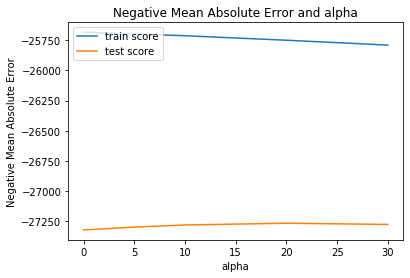

In [114]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

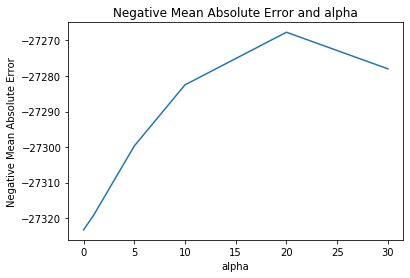

In [115]:
# plotting

plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.show()

### Model with optimal alpha Lasso regression
#### It can be observed that Test Error is peaing out at 20 and keeps decresing thereafter. Hence 20 is the value of alpha suitable for Lasso Regression

##### The final ridge model with alpha=20 has 73.28% of accuracy on test dataset

In [116]:
# model with optimal alpha
# lasso regression
lasso_final = Lasso(alpha=20)
lasso_final.fit(X_train, y_train)

# predict
y_train_pred_l = lasso_final.predict(X_train)
print(round(r2_score(y_true=y_train, y_pred=y_train_pred_l)*100,2))
y_test_pred_l = lasso_final.predict(X_test)
print(round(r2_score(y_true=y_test, y_pred=y_test_pred_l)*100,2))

79.03
73.28


In [117]:
# lasso model parameters
model_parameters = list(lasso_final.coef_)
model_parameters.insert(0, lasso_final.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 202726.884),
 ('FullBath', 35442.368),
 ('MSSubClass_160', -29561.933),
 ('MSSubClass_180', -56707.907),
 ('Neighborhood_ClearCr', 29678.257),
 ('Neighborhood_Crawfor', 41364.357),
 ('Neighborhood_NoRidge', 79785.7),
 ('Neighborhood_Veenker', 26487.171),
 ('Condition2_PosN', -272806.449),
 ('BldgType_Duplex', -31258.731),
 ('OverallQual_2', -36831.845),
 ('OverallQual_8', 44549.538),
 ('OverallQual_9', 83813.078),
 ('OverallQual_10', 137740.471),
 ('RoofStyle_Shed', 49397.996),
 ('Exterior1st_ImStucc', -38694.728),
 ('Exterior1st_Stone', 16025.418),
 ('Foundation_Stone', 30163.784),
 ('Foundation_Wood', 28773.528),
 ('BsmtQual_Fa', -73918.58),
 ('BsmtQual_Gd', -38737.845),
 ('BsmtQual_TA', -56372.066),
 ('BsmtExposure_Gd', 31202.168),
 ('KitchenQual_Fa', -79091.335),
 ('KitchenQual_Gd', -38074.326),
 ('KitchenQual_TA', -59646.145)]

In [118]:
lasso_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lasso_coef.columns = ['Variable', 'Coef']
lasso_coef.sort_values(by=['Coef'], ascending=False)

,Variable,Coef
0,constant,202726.884
13,OverallQual_10,137740.471
12,OverallQual_9,83813.078
6,Neighborhood_NoRidge,79785.700
14,RoofStyle_Shed,49397.996
11,OverallQual_8,44549.538
5,Neighborhood_Crawfor,41364.357
1,FullBath,35442.368
22,BsmtExposure_Gd,31202.168
17,Foundation_Stone,30163.784


#### The top 5 predictive variables in final Lasso model are 
##### 1. OverallQual_10
##### 2. OverallQual_9
##### 3. Neighborhood_NoRidge
##### 4. RoofStyle_Shed
##### 5. OverallQual_8

## Question 3 - Recomputing Lasso by removing top 5 predictor variables

In [119]:
X_train_new_Lasso = X_train.drop(['OverallQual_10','OverallQual_9','Neighborhood_NoRidge',
                                  'RoofStyle_Shed','OverallQual_8'], axis=1)


In [120]:
X_train_new_Lasso.shape

(1022, 20)

In [121]:
X_test_new_Lasso = X_test.drop(['OverallQual_10','OverallQual_9','Neighborhood_NoRidge',
                                  'RoofStyle_Shed','OverallQual_8'], axis=1)

In [122]:
X_test_new_Lasso.shape

(438, 20)

In [123]:
# model with optimal alpha
# lasso regression
lasso_n = Lasso(alpha=20)
lasso_n.fit(X_train_new_Lasso, y_train)

# predict
y_train_pred_lq3 = lasso_n.predict(X_train_new_Lasso)
print(round(r2_score(y_true=y_train, y_pred=y_train_pred_lq3)*100,2))
y_test_pred_lq3 = lasso_n.predict(X_test_new_Lasso)
print(round(r2_score(y_true=y_test, y_pred=y_test_pred_lq3)*100,2))

69.48
66.06


In [124]:
# lasso model parameters
model_parameters_n = list(lasso_n.coef_)
model_parameters_n.insert(0, lasso_n.intercept_)
model_parameters_n = [round(x, 3) for x in model_parameters_n]
cols_n = X_train_new_Lasso.columns
cols_n = cols_n.insert(0, "constant")
list(zip(cols_n, model_parameters_n))

[('constant', 262553.005),
 ('FullBath', 43874.179),
 ('MSSubClass_160', -38744.595),
 ('MSSubClass_180', -63993.344),
 ('Neighborhood_ClearCr', 15576.827),
 ('Neighborhood_Crawfor', 36455.733),
 ('Neighborhood_Veenker', 21933.606),
 ('Condition2_PosN', -232852.981),
 ('BldgType_Duplex', -37847.985),
 ('OverallQual_2', -29926.944),
 ('Exterior1st_ImStucc', 26450.231),
 ('Exterior1st_Stone', 12394.507),
 ('Foundation_Stone', 25106.722),
 ('Foundation_Wood', 22857.069),
 ('BsmtQual_Fa', -104673.679),
 ('BsmtQual_Gd', -63554.078),
 ('BsmtQual_TA', -86220.141),
 ('BsmtExposure_Gd', 43867.751),
 ('KitchenQual_Fa', -119548.002),
 ('KitchenQual_Gd', -71637.506),
 ('KitchenQual_TA', -101387.232)]

In [125]:
lasso_coef_n = pd.DataFrame(list(zip(cols_n,model_parameters_n)))
lasso_coef_n.columns = ['Variable', 'Coef']
lasso_coef_n.sort_values(by=['Coef'], ascending=False)

,Variable,Coef
0,constant,262553.005
1,FullBath,43874.179
17,BsmtExposure_Gd,43867.751
5,Neighborhood_Crawfor,36455.733
10,Exterior1st_ImStucc,26450.231
12,Foundation_Stone,25106.722
13,Foundation_Wood,22857.069
6,Neighborhood_Veenker,21933.606
4,Neighborhood_ClearCr,15576.827
11,Exterior1st_Stone,12394.507


### Obervations

#### The top 5 predictive variables in after exclusion of top 5 from the previous Lasso model are 
##### 1. Exterior1st_ImStucc
##### 2. BsmtExposure_Gd
##### 3. FullBath
##### 4. Neighborhood_Crawfor
##### 5. Foundation_Wood

## Question 1 - changes in the model if you choose to double the value of alpha for both ridge and lasso

#### Changes in Ridge Model

In [126]:
# Initial model with Alpha = 1 
# Current model with Alpha doubled = 2

ridge_Q1 = Ridge(alpha=2)
ridge_Q1.fit(X_train, y_train)

y_train_pred_Q1 = ridge_Q1.predict(X_train)
print(round(r2_score(y_true=y_train, y_pred=y_train_pred_Q1)*100,2))
y_test_pred_Q1 = ridge_Q1.predict(X_test)
print(round(r2_score(y_true=y_test, y_pred=y_test_pred_Q1)*100,2))

78.21
74.6


In [127]:
# Ridge model parameters
model_parameters_ridge_Q1 = list(ridge_Q1.coef_)
model_parameters_ridge_Q1.insert(0, ridge_Q1.intercept_)
model_parameters_ridge_Q1 = [round(x, 3) for x in model_parameters_ridge_Q1]
ridge_cols_Q1 = X_train.columns
ridge_cols_Q1 = ridge_cols_Q1.insert(0, "constant")
list(zip(cols, model_parameters_ridge_Q1))

[('constant', 201723.999),
 ('FullBath', 35994.941),
 ('MSSubClass_160', -29057.984),
 ('MSSubClass_180', -45073.037),
 ('Neighborhood_ClearCr', 28104.87),
 ('Neighborhood_Crawfor', 39108.351),
 ('Neighborhood_NoRidge', 78470.954),
 ('Neighborhood_Veenker', 24106.116),
 ('Condition2_PosN', -88914.175),
 ('BldgType_Duplex', -30386.75),
 ('OverallQual_2', -24368.152),
 ('OverallQual_8', 43453.844),
 ('OverallQual_9', 78307.768),
 ('OverallQual_10', 109379.988),
 ('RoofStyle_Shed', 29775.764),
 ('Exterior1st_ImStucc', -19148.136),
 ('Exterior1st_Stone', 13967.504),
 ('Foundation_Stone', 20100.162),
 ('Foundation_Wood', 19626.046),
 ('BsmtQual_Fa', -69421.865),
 ('BsmtQual_Gd', -39327.662),
 ('BsmtQual_TA', -56670.762),
 ('BsmtExposure_Gd', 32403.717),
 ('KitchenQual_Fa', -74176.966),
 ('KitchenQual_Gd', -36866.607),
 ('KitchenQual_TA', -59140.839)]

In [128]:
Ridge_coef_Q1 = pd.DataFrame(list(zip(ridge_cols_Q1,model_parameters_ridge_Q1)))
Ridge_coef_Q1.columns = ['Variable', 'Coef']
Ridge_coef_Q1.sort_values(by=['Coef'], ascending=False)

,Variable,Coef
0,constant,201723.999
13,OverallQual_10,109379.988
6,Neighborhood_NoRidge,78470.954
12,OverallQual_9,78307.768
11,OverallQual_8,43453.844
5,Neighborhood_Crawfor,39108.351
1,FullBath,35994.941
22,BsmtExposure_Gd,32403.717
14,RoofStyle_Shed,29775.764
4,Neighborhood_ClearCr,28104.870


### Obervations

#### The top 5 predictive variables are
##### 1. OverallQual_10
##### 2. Neighborhood_NoRidge
##### 3. OverallQual_9
##### 4. OverallQual_8
##### 5. Neighborhood_Crawfor

#### Changes in Lasso Model

In [129]:
# Initial model with Alpha = 20 
# Current model with Alpha doubled = 40

lasso_Q1 = Lasso(alpha=40)
lasso_Q1.fit(X_train, y_train)

# predict
y_train_pred_Q1 = lasso_Q1.predict(X_train)
print(round(r2_score(y_true=y_train, y_pred=y_train_pred_Q1)*100,2))
y_test_pred_Q1 = lasso_Q1.predict(X_test)
print(round(r2_score(y_true=y_test, y_pred=y_test_pred_Q1)*100,2))

78.93
73.67


In [130]:
# lasso model parameters
model_parameters_Q1 = list(lasso_Q1.coef_)
model_parameters_Q1.insert(0, lasso_Q1.intercept_)
model_parameters_Q1 = [round(x, 3) for x in model_parameters_Q1]
lasso_cols_Q1 = X_train_new_Lasso.columns
lasso_cols_Q1 = cols_n.insert(0, "constant")
list(zip(cols_n, model_parameters_Q1))

[('constant', 202121.46),
 ('FullBath', 35371.719),
 ('MSSubClass_160', -29234.64),
 ('MSSubClass_180', -53436.874),
 ('Neighborhood_ClearCr', 29064.104),
 ('Neighborhood_Crawfor', 40933.061),
 ('Neighborhood_Veenker', 78809.104),
 ('Condition2_PosN', 24561.527),
 ('BldgType_Duplex', -249361.031),
 ('OverallQual_2', -30503.027),
 ('Exterior1st_ImStucc', -26912.412),
 ('Exterior1st_Stone', 44470.955),
 ('Foundation_Stone', 83706.747),
 ('Foundation_Wood', 135453.535),
 ('BsmtQual_Fa', 38870.708),
 ('BsmtQual_Gd', -17442.508),
 ('BsmtQual_TA', 6078.461),
 ('BsmtExposure_Gd', 22664.165),
 ('KitchenQual_Fa', 18528.36),
 ('KitchenQual_Gd', -72407.258),
 ('KitchenQual_TA', -38258.818)]

In [131]:
lasso_coef_Q1 = pd.DataFrame(list(zip(lasso_cols_Q1,model_parameters_Q1)))
lasso_coef_Q1.columns = ['Variable', 'Coef']
lasso_coef_Q1.sort_values(by=['Coef'], ascending=False)

,Variable,Coef
0,constant,202121.460
13,Foundation_Stone,135453.535
12,Exterior1st_Stone,83706.747
6,Neighborhood_Crawfor,78809.104
11,Exterior1st_ImStucc,44470.955
5,Neighborhood_ClearCr,40933.061
14,Foundation_Wood,38870.708
1,constant,35371.719
4,MSSubClass_180,29064.104
7,Neighborhood_Veenker,24561.527


### Obervations

#### The top 5 predictive variables are
##### 1. Foundation_Stone
##### 2. Exterior1st_Stone
##### 3. Neighborhood_Crawfor
##### 4. Exterior1st_ImStucc
##### 5. Neighborhood_ClearCr